# Tensor Product

1. 张量积是双线性的：$\left(\alpha x_1+x_2\right) \otimes y=\alpha x_1 \otimes y+x_2 \otimes y$和$x \otimes\left(\alpha y_1+y_2\right)=\alpha x \otimes y_1+x \otimes y_2$
2. 张量积是等变的：$(D x) \otimes(D y)=D(x \otimes y)$, 其中D是来自E(3)的某种对称运算的表示

类[`e3nn.o3.TensorProduct`](https://docs.e3nn.org/en/latest/api/o3/o3_tp.html#e3nn.o3.TensorProduct)实现了不可约表示([`e3nn.o3.Irreps`](https://docs.e3nn.org/en/latest/api/o3/o3_irreps.html#e3nn.o3.Irreps))的有限直接和间接的所有可能的张量积。虽然[`e3nn.o3.TensorProduct`](https://docs.e3nn.org/en/latest/api/o3/o3_tp.html#e3nn.o3.TensorProduct)提供了最大的灵活性，但许多子类提供了张量积的各种典型特殊情况。



In [1]:
from e3nn import o3
import torch

## e3nn.o3.FullTensorProduct:



FullTensorProduct(2x0e+3x1o x 5x0e+7x1e -> 21x0o+10x0e+36x1o+14x1e+21x2o | 102 paths | 0 weights)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

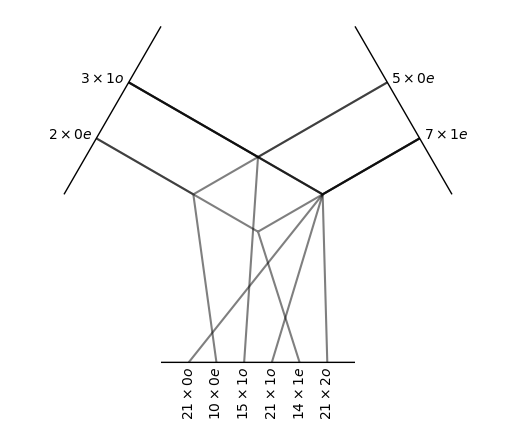

In [4]:
tp = o3.FullTensorProduct(
    irreps_in1='2x0e + 3x1o',
    irreps_in2='5x0e + 7x1e'
)
print(tp)
tp.visualize()

全张量积是自然的。每个可能的输出，每一对输入的输出，都是独立创建和返回的。输出不相互混合。请注意，输出的多重性是各自输入多重性的乘积。

## e3nn.o3.FullyConnectedTensorProduct


## 

FullyConnectedTensorProduct(5x0e+5x1e x 6x0e+4x1e -> 15x0e+3x1e | 960 paths | 960 weights)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

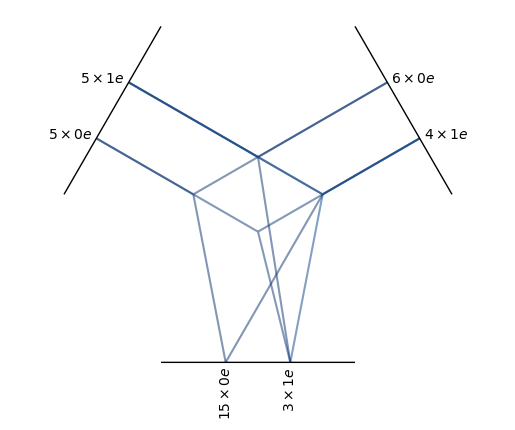

In [5]:
tp = o3.FullyConnectedTensorProduct(
    irreps_in1='5x0e + 5x1e',
    irreps_in2='6x0e + 4x1e',
    irreps_out='15x0e + 3x1e'
)
print(tp)
tp.visualize()

在一个全连通张量积中，生成了通向`irreps_out`中指定的任意一个不重合点的所有路径。与`[e3nn](https://docs.e3nn.org/en/latest/api/o3/o3_tp.html#e3nn.o3.FullTensorProduct)`不同的是，每个输出都是兼容路径的学习加权和。这使得`[e3nn](https://docs.e3nn.org/en/latest/api/o3/o3_tp.html#e3nn.o3.FullyConnectedTensorProduct)`可以产生任何倍数的输出;请注意，上面的例子有$5 \times 6+5 \times 4=50$种创建标量(`0e`)的方法，但指定的`irreps_out`只有15个标量，每个标量都是这50个可能的标量的学习加权组合。可视化中的蓝色表示路径具有这些可学习的权重。

所有可能的输出irr不需要包含在`irreps_out`中的`e3nn.o3.FullyConnectedTensorProduct`: `o3.FullyConnectedTensorProduct(irreps_in1='5x1o', irreps_in2='3x1o', irreps_out='20x0e')`将只计算其输入之间的内积，因为1e，向量叉积的输出不可约表示，不存在于`irreps_out`中。还请注意，在这个例子中有20个输出标量，即使给定的输入只能产生15个唯一的标量，这也是允许的，因为每个输出是这15个标量的学习线性组合，没有限制可以请求多少或多少输出。





## e3nn.o3.ElementwiseTensorProduct

ElementwiseTensorProduct(5x0e+5x1e x 4x0e+6x1e -> 4x0e+1x1e+5x0e+5x1e+5x2e | 20 paths | 0 weights)


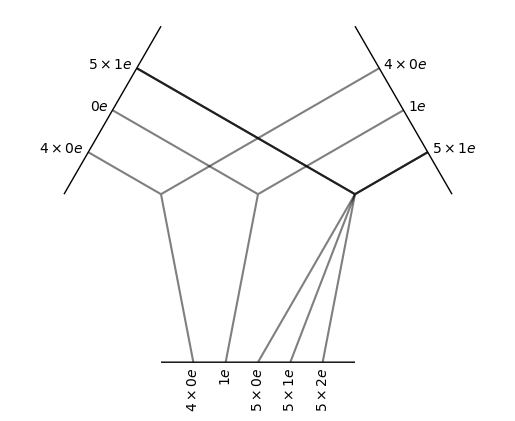

In [2]:
tp = o3.ElementwiseTensorProduct(
    irreps_in1='5x0e + 5x1e',
    irreps_in2='4x0e + 6x1e'
)
print(tp)
tp.visualize();

在元素张量积中，重复是一一相乘的。请注意，在可视化中输入是如何分割的，并且输出的多重性与输入的多重性相匹配。

## e3nn.o3.TensorSquare

TensorSquare(5x1e+1x2e -> 16x0e+15x1e+21x2e+5x3e+1x4e | 58 paths | 0 weights)


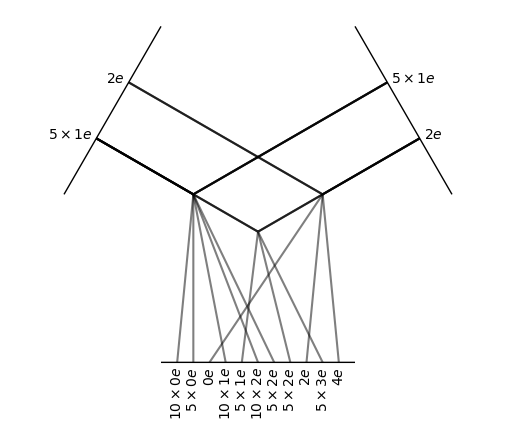

In [3]:
tp = o3.TensorSquare("5x1e + 2e")
print(tp)
tp.visualize();

张量平方运算只计算张量的非零项乘以它本身。它还应用了不同的归一化规则，考虑到张量时间本身在统计上不同于两个独立张量的乘积。

## 示例
创建一个模块，计算元素的叉积
$z_u=x_u \wedge y_u$

AttributeError: module 'matplotlib.cm' has no attribute 'get_cmap'

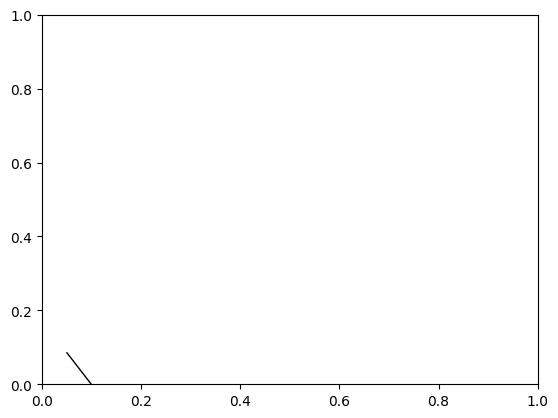

In [4]:
from e3nn import o3
module = o3.TensorProduct(
    "16x1o", "16x1o", "16x1e",
    [
        (0, 0, 0, "uuu", False)
    ]
)
module.visualize()

现在将所有16个向量与所有16个向量混合，得到16个伪向量           
$z_w=\sum_{u, v} w_{u v w} x_u \wedge y_v$

TensorProduct(16x1o x 16x1o -> 16x1e | 4096 paths | 4096 weights)


(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

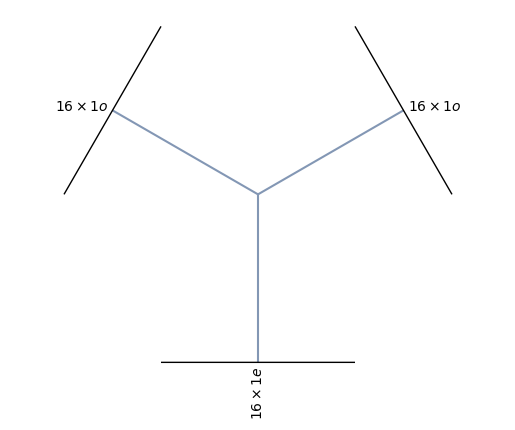

In [8]:
module = o3.TensorProduct(
    [(16, (1, -1))],
    [(16, (1, -1))],
    [(16, (1,  1))],
    [
        (0, 0, 0, "uvw", True)
    ]
)
print(module)
module.visualize()

使用自定义输入方差和自定义路径权重

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

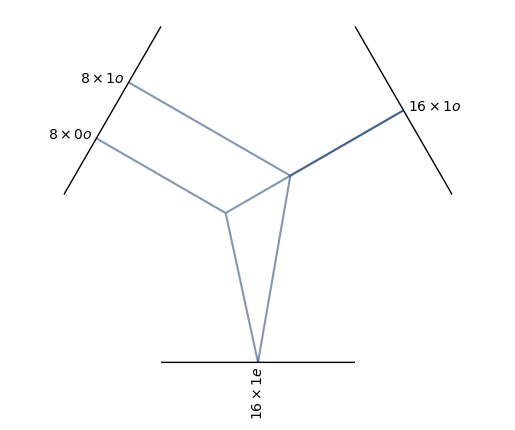

In [10]:
module = o3.TensorProduct(
    "8x0o + 8x1o",
    "16x1o",
    "16x1e",
    [
        (0, 0, 0, "uvw", True, 3),
        (1, 0, 0, "uvw", True, 1),
    ],
    in2_var=[1/16]
)
module.visualize()

点积的例子

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

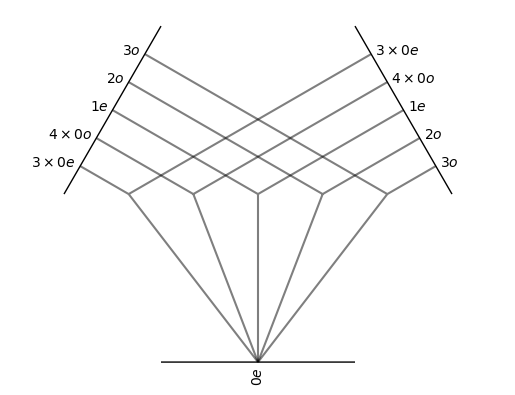

In [11]:
irreps = o3.Irreps("3x0e + 4x0o + 1e + 2o + 3o")
module = o3.TensorProduct(irreps, irreps, "0e", [
    (i, i, 0, 'uuw', False)
    for i, (mul, ir) in enumerate(irreps)
])
module.visualize()

实施$z_u=x_u \otimes\left(\sum_v w_{u v} y_v\right)$

(<Figure size 640x480 with 1 Axes>, <AxesSubplot:>)

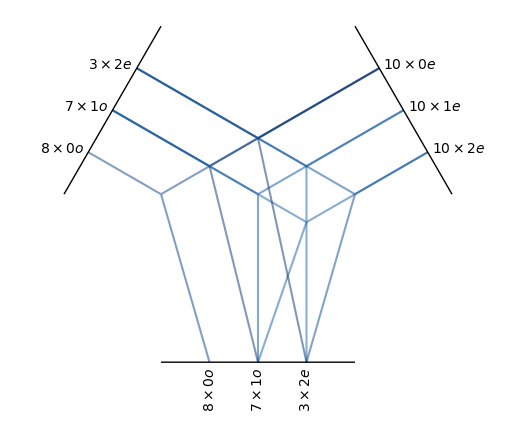

In [14]:
module = o3.TensorProduct(
    "8x0o + 7x1o + 3x2e",
    "10x0e + 10x1e + 10x2e",
    "8x0o + 7x1o + 3x2e",
    [
        # paths for the l=0:
        (0, 0, 0, "uvu", True),  # 0x0->0
        # paths for the l=1:
        (1, 0, 1, "uvu", True),  # 1x0->1
        (1, 1, 1, "uvu", True),  # 1x1->1
        (1, 2, 1, "uvu", True),  # 1x2->1
        # paths for the l=2:
        (2, 0, 2, "uvu", True),  # 2x0->2
        (2, 1, 2, "uvu", True),  # 2x1->2
        (2, 2, 2, "uvu", True),  # 2x2->2
    ]
)
module.visualize()

使用xavier统一初始化的张量积

In [16]:
irreps_1 = o3.Irreps("5x0e + 10x1o + 1x2e")
irreps_2 = o3.Irreps("5x0e + 10x1o + 1x2e")
irreps_out = o3.Irreps("5x0e + 10x1o + 1x2e")
# create a Fully Connected Tensor Product
module = o3.TensorProduct(
    irreps_1,
    irreps_2,
    irreps_out,
    [
        (i_1, i_2, i_out, "uvw", True, mul_1 * mul_2)
        for i_1, (mul_1, ir_1) in enumerate(irreps_1)
        for i_2, (mul_2, ir_2) in enumerate(irreps_2)
        for i_out, (mul_out, ir_out) in enumerate(irreps_out)
        if ir_out in ir_1 * ir_2
    ]
)
with torch.no_grad():
    for weight in module.weight_views():
        mul_1, mul_2, mul_out = weight.shape
        # formula from torch.nn.init.xavier_uniform_
        a = (6 / (mul_1 * mul_2 + mul_out))**0.5
        new_weight = torch.empty_like(weight)
        new_weight.uniform_(-a, a)
        weight[:] = new_weight

n = 1_000
vars = module(irreps_1.randn(n, -1), irreps_2.randn(n, -1)).var(0)
assert vars.min() > 1 / 3
assert vars.max() < 3
